In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/BankChurners.csv')

Mounted at /content/drive


In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.isna().any().any()

False

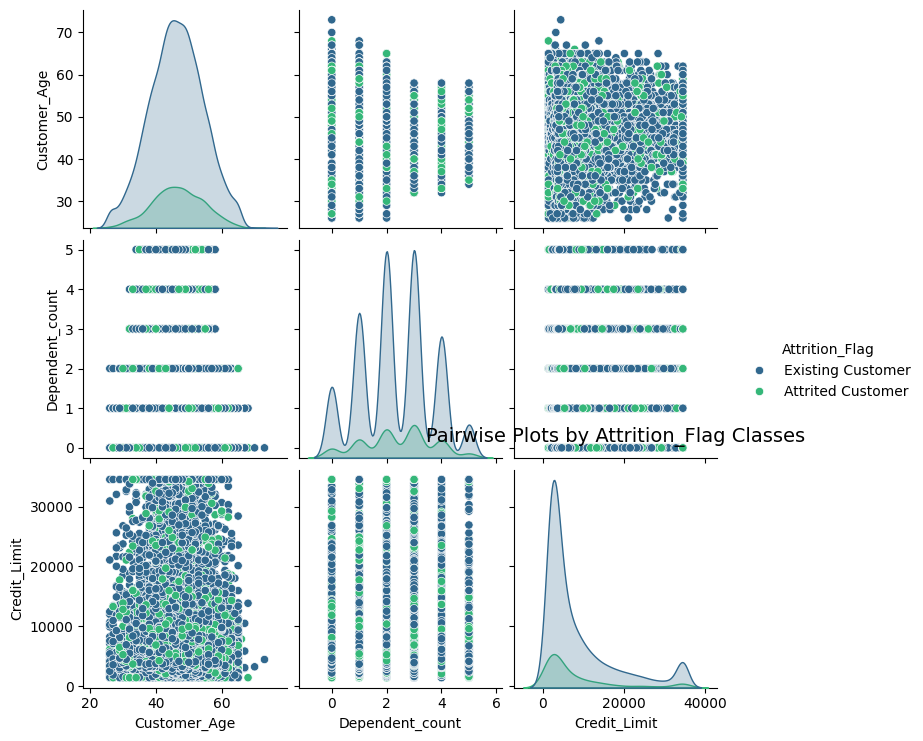

In [7]:


sns.pairplot(
    data,
    vars=['Customer_Age', 'Dependent_count', 'Credit_Limit'],  # Removed 'Gender' from vars
    hue='Attrition_Flag',
    palette='viridis',
    diag_kind='kde'
)

plt.title("Pairwise Plots by Attrition_Flag Classes", loc='center', fontsize=14, pad=20)
plt.show()

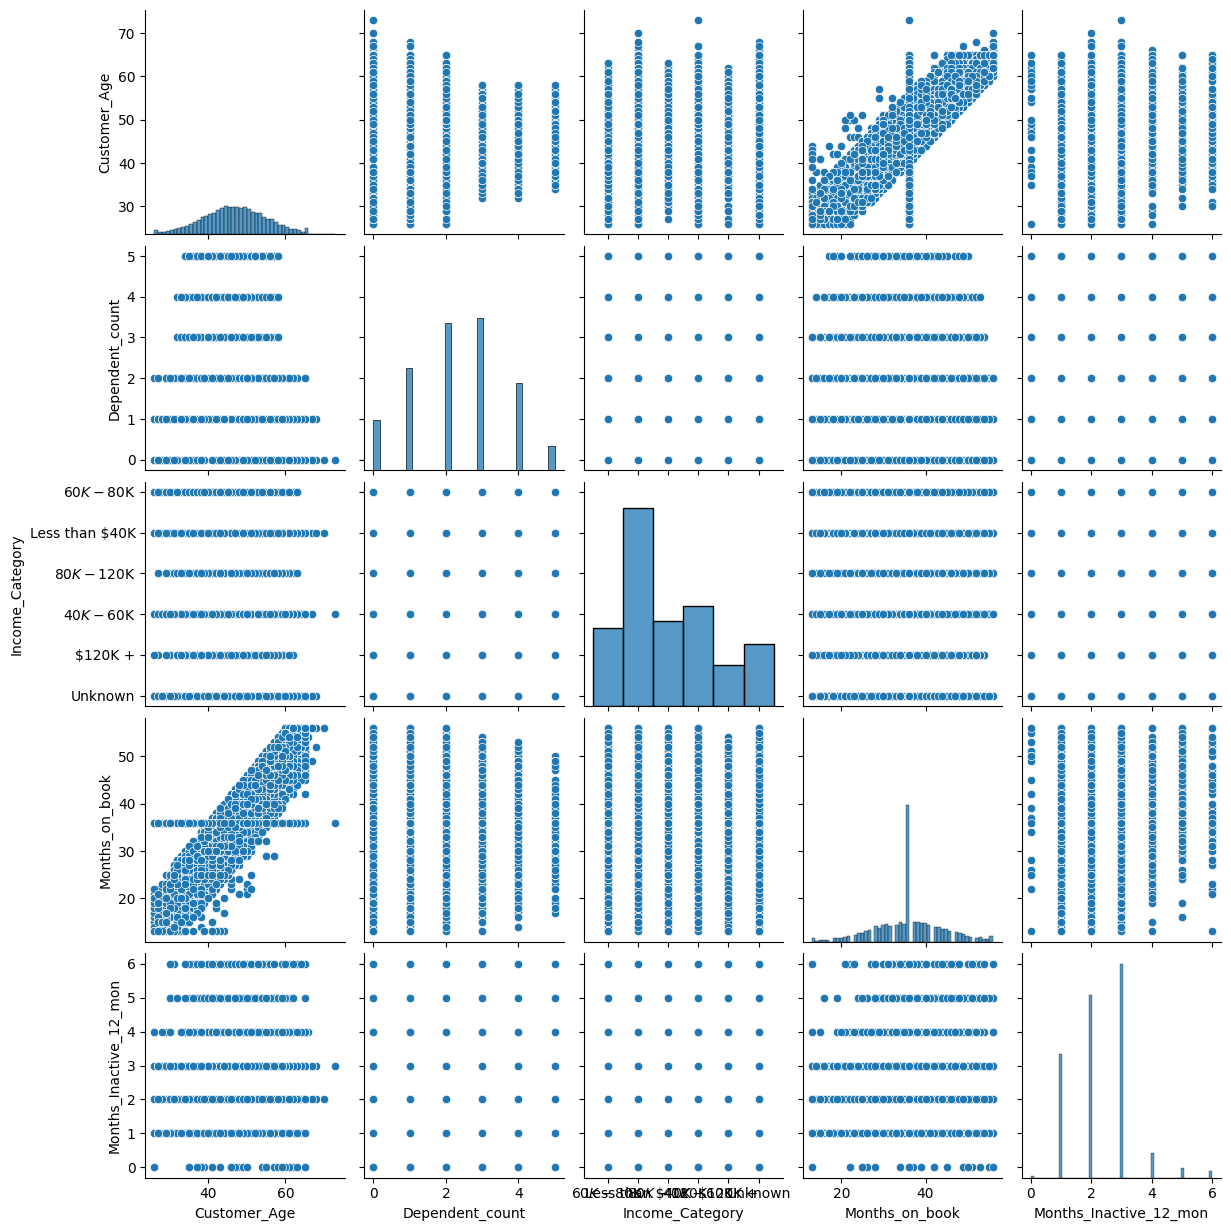

In [8]:
sns.pairplot(data, vars=['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book', 'Months_Inactive_12_mon'])
plt.show()


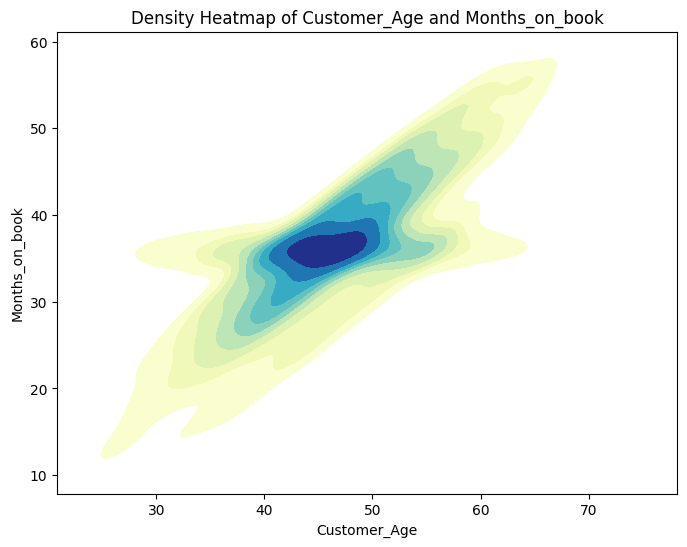

In [9]:
feature_x = 'Customer_Age'
feature_y = 'Months_on_book'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x=feature_x, y=feature_y, fill=True, cmap="YlGnBu")
plt.title(f"Density Heatmap of {feature_x} and {feature_y}")
plt.show()



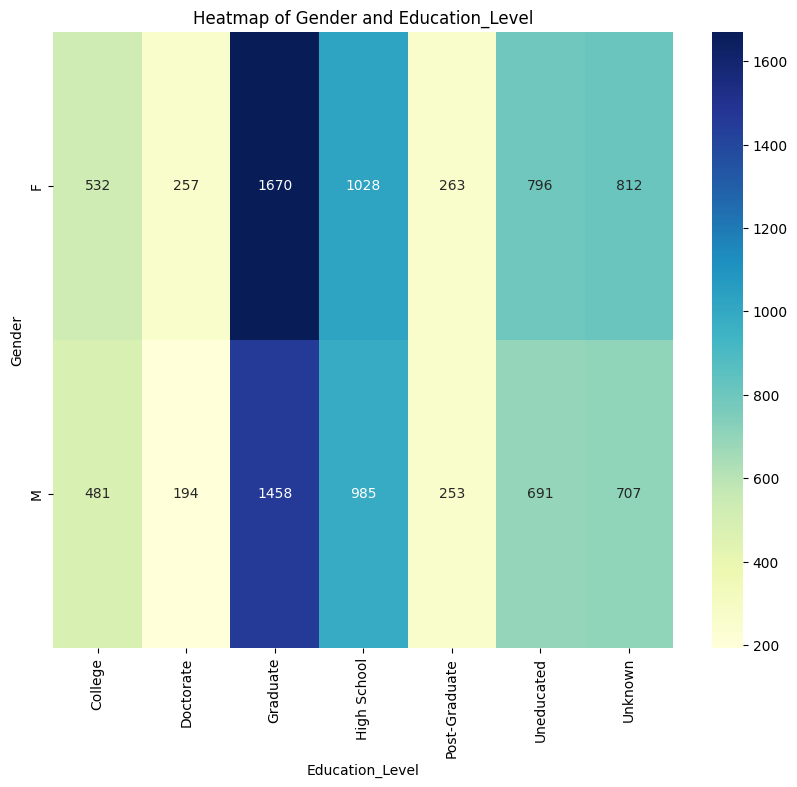

In [10]:
category_x = 'Gender'
category_y = 'Education_Level'
contingency_table = pd.crosstab(data[category_x], data[category_y])
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table,  annot=True, fmt="d", cmap="YlGnBu")
plt.title(f"Heatmap of {category_x} and {category_y}")
plt.xlabel(category_y)
plt.ylabel(category_x)
plt.show()


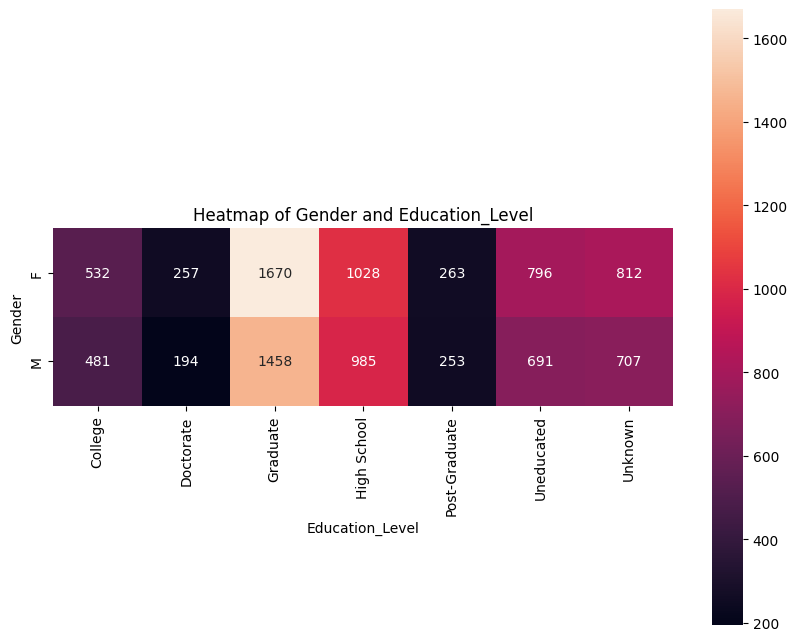

In [11]:
category_x = 'Gender'
category_y = 'Education_Level'
corellation_matrix = pd.crosstab(data[category_x], data[category_y])
plt.figure(figsize=(10, 8))
sns.heatmap(corellation_matrix, annot=True, fmt="d", square=True)
plt.title(f"Heatmap of {category_x} and {category_y}")
plt.xlabel(category_y)
plt.ylabel(category_x)
plt.show()

In [12]:
feature_column = 'Attrition_Flag'
num_classes = data[feature_column].nunique()
print(f"Number of unique classes in '{feature_column}':", num_classes)


Number of unique classes in 'Attrition_Flag': 2


In [13]:
classes = data[feature_column].unique()
print(f"Classes in '{feature_column}':", classes)

Classes in 'Attrition_Flag': ['Existing Customer' 'Attrited Customer']


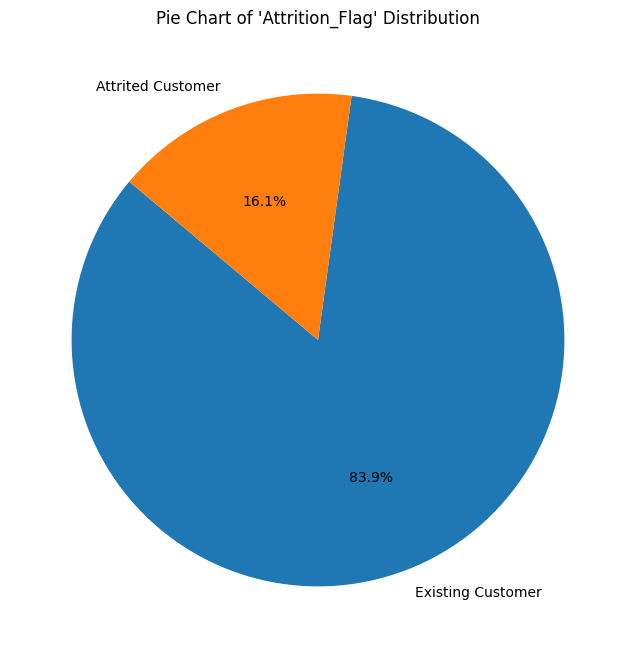

In [14]:
data_counts = data[feature_column].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Pie Chart of '{feature_column}' Distribution")
plt.show()

In [15]:
def plot_confusion_matrix(conf_matrix, title, labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [16]:
label_encoder = LabelEncoder()
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])
print(data['Attrition_Flag'])

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64


In [17]:
y = data['Attrition_Flag']
x = data[['Months_on_book', 'Dependent_count', 'Contacts_Count_12_mon','Customer_Age','Credit_Limit','Total_Relationship_Count', 'Education_Level', 'Income_Category','Card_Category','Credit_Limit','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
x = pd.get_dummies(x, columns=['Education_Level', 'Income_Category', 'Card_Category'], drop_first=True)


In [18]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=23)  # 60% training
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=23)  # 20% validation, 20% test


In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [20]:
model = LogisticRegression(random_state=23, max_iter=50)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=50, random_state=23)

In [21]:
print(x.dtypes)

Months_on_book                      int64
Dependent_count                     int64
Contacts_Count_12_mon               int64
Customer_Age                        int64
Credit_Limit                      float64
Total_Relationship_Count            int64
Credit_Limit                      float64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Education_Level_Unknown              bool
Income_Category_$40K - $60K          bool
Income_Category_$60K - $80K          bool
Income_Category_$80K - $120K         bool
Income_Category_Less than $40K       bool
Income_Category_Unknown              bool
Card_Category_Gold                   bool
Card_Category_Platinum               bool
Card_Category_Silver              

In [22]:
y_val_pred = model.predict(x_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8918518518518519
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.45      0.55       305
           1       0.91      0.97      0.94      1720

    accuracy                           0.89      2025
   macro avg       0.82      0.71      0.75      2025
weighted avg       0.88      0.89      0.88      2025



In [23]:
y_test_pred = model.predict(x_test_scaled)

# Evaluate the final model
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.8943731490621916
Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       341
           1       0.91      0.97      0.94      1685

    accuracy                           0.89      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.89      0.89      2026



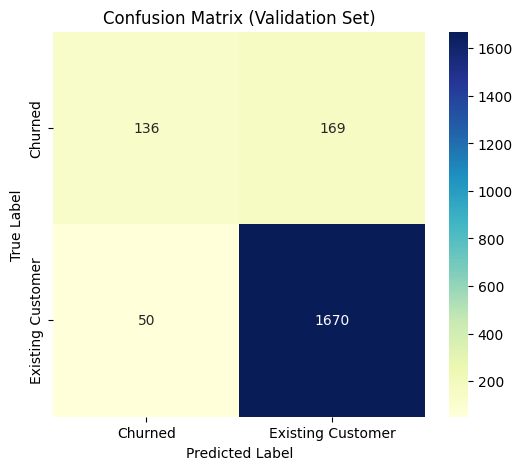

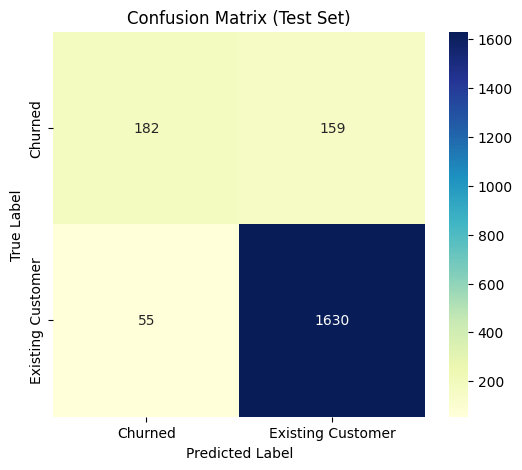

In [24]:
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

class_labels = ["Churned", "Existing Customer"]


plot_confusion_matrix(conf_matrix_val, "Confusion Matrix (Validation Set)", class_labels)

plot_confusion_matrix(conf_matrix_test, "Confusion Matrix (Test Set)", class_labels)

In [25]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

In [26]:
model = LogisticRegression(random_state=42, max_iter=50)
model.fit(x_train_balanced, y_train_balanced)


LogisticRegression(max_iter=50, random_state=42)

In [27]:
y_val_pred = model.predict(x_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8069135802469136
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.76      0.54       305
           1       0.95      0.81      0.88      1720

    accuracy                           0.81      2025
   macro avg       0.69      0.79      0.71      2025
weighted avg       0.87      0.81      0.83      2025



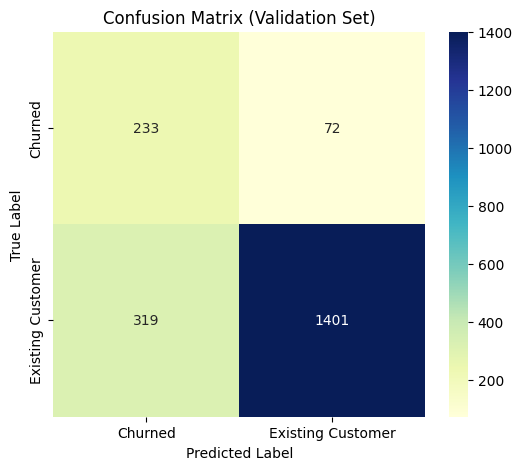

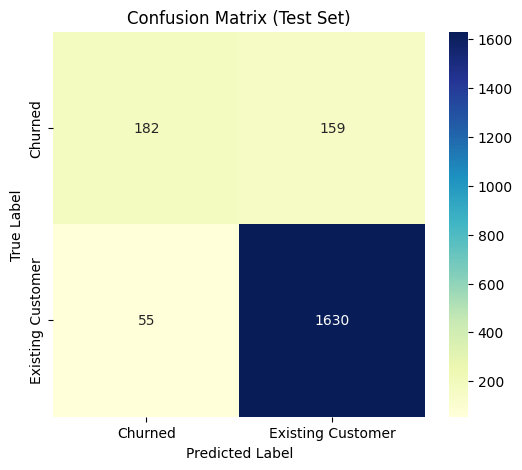

In [28]:
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

class_labels = ["Churned", "Existing Customer"]


plot_confusion_matrix(conf_matrix_val, "Confusion Matrix (Validation Set)", class_labels)

plot_confusion_matrix(conf_matrix_test, "Confusion Matrix (Test Set)", class_labels)

In [29]:

y_val_probs = model.predict_proba(x_val_scaled)[:, 1]

threshold = 0.45



y_val_pred_adjusted = (y_val_probs >= threshold).astype(int)


print("Validation Accuracy with Adjusted Threshold:", accuracy_score(y_val, y_val_pred_adjusted))
print("Validation Classification Report with Adjusted Threshold:\n", classification_report(y_val, y_val_pred_adjusted))


y_test_probs = model.predict_proba(x_test_scaled)[:, 1]

y_test_pred_adjusted = (y_test_probs >= threshold).astype(int)

print("Test Accuracy with Adjusted Threshold:", accuracy_score(y_test, y_test_pred_adjusted))
print("Test Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_test_pred_adjusted))

Validation Accuracy with Adjusted Threshold: 0.8246913580246914
Validation Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.45      0.71      0.55       305
           1       0.94      0.84      0.89      1720

    accuracy                           0.82      2025
   macro avg       0.70      0.78      0.72      2025
weighted avg       0.87      0.82      0.84      2025

Test Accuracy with Adjusted Threshold: 0.8385982230997039
Test Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.51      0.81      0.63       341
           1       0.96      0.85      0.90      1685

    accuracy                           0.84      2026
   macro avg       0.73      0.83      0.76      2026
weighted avg       0.88      0.84      0.85      2026



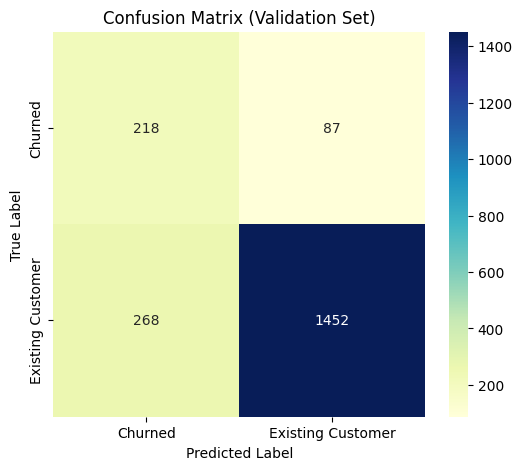

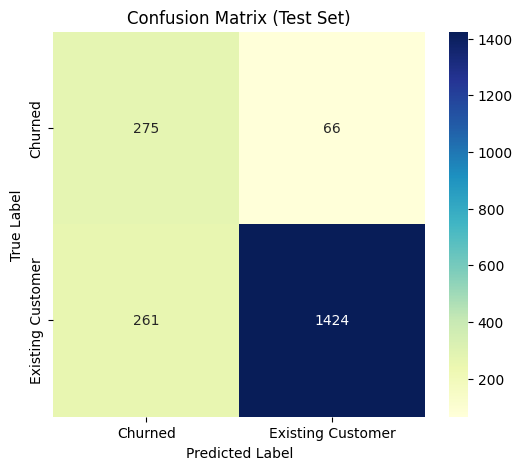

In [30]:
conf_matrix_val = confusion_matrix(y_val, y_val_pred_adjusted)

conf_matrix_test = confusion_matrix(y_test, y_test_pred_adjusted)

class_labels = ["Churned", "Existing Customer"]


plot_confusion_matrix(conf_matrix_val, "Confusion Matrix (Validation Set)", class_labels)

plot_confusion_matrix(conf_matrix_test, "Confusion Matrix (Test Set)", class_labels)